In [3]:
import pandas as pd
import numpy as np

/anaconda3/lib/python2.7/site-packages/mkl_fft/__init__.py:27: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  from ._pydfti import (fft, ifft, fft2, ifft2, fftn, ifftn, rfft, irfft,


In [26]:

# df = pd.DataFrame(np.random.randint(0,100,size=(100,2)), columns = list('AB'))

In [27]:
# df1 = df.mask(np.random.choice([True,False],size = df.shape, p=[.2,.8]))

In [28]:
# df2 = df1['B'].replace(np.nan,df['B'].mean()).head(5)

In [70]:
# df1['B'].head(10)

In [101]:
#Importing csv that needs NA filling
df1 = pd.read_csv('fillna.csv')

In [102]:
df1.isna().sum()


Unnamed: 0       0
DATE             0
DEW            299
TMP            299
DIR            963
SPD            300
HUM            290
NO2            376
O3             761
PM25          2861
dtype: int64

In [106]:
df1_null = df1
df1_null.isna().sum()


Unnamed: 0    0
DATE          0
DEW           0
TMP           0
DIR           0
SPD           0
HUM           0
NO2           0
O3            0
PM25          0
dtype: int64

In [107]:
df1_null['DEW'] = df1_null['DEW'].replace(np.NaN, df1_null['DEW'].mean())
df1_null['TMP'] = df1_null['TMP'].replace(np.NaN, df1_null['TMP'].mean())
df1_null['DIR'] = df1_null['DIR'].replace(np.NaN, df1_null['DIR'].mean())
df1_null['SPD'] = df1_null['SPD'].replace(np.NaN, df1_null['SPD'].mean())
df1_null['HUM'] = df1_null['HUM'].replace(np.NaN, df1_null['HUM'].mean())
df1_null['NO2'] = df1_null['NO2'].replace(np.NaN, df1_null['NO2'].mean())
df1_null['O3']  = df1_null['O3'].replace(np.NaN, df1_null['O3'].mean())
df1_null['PM25'] = df1_null['PM25'].replace(np.NaN, df1_null['PM25'].mean())






In [95]:
df1.isna().sum()


Unnamed: 0    0
DATE          0
DEW           0
TMP           0
DIR           0
SPD           0
HUM           0
NO2           0
O3            0
PM25          0
dtype: int64

In [109]:
#Predicting the missing values
df2_null = pd.read_csv('fillna.csv')
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data_with_null = df2_null[['DEW','TMP','DIR','SPD','HUM','NO2','O3','PM25']].dropna()
data_without_null = data_with_null.dropna()
train_data_x = data_without_null.iloc[:,:6]
train_data_y = data_without_null.iloc[:,:6]
linreg.fit(train_data_x,train_data_y)
test_data = data_with_null.iloc[:,:6]
temp_predicted['TMP'] = pd.Dataframe(linreg.predict(test_data))
data_with_null_temp.fillna(temp_predicted.TMP,inplace=True)

AttributeError: 'module' object has no attribute 'Dataframe'

In [121]:
#Filling the values with forfward fill - Fill with previous values.
df3 = pd.read_csv('fillna.csv')

df3 = df3.fillna(method='ffill',limit=10)
df3.isna().sum()


Unnamed: 0       0
DATE             0
DEW            193
TMP            193
DIR            194
SPD            193
HUM            193
NO2            263
O3             637
PM25          2395
dtype: int64

In [124]:
#Fills the null values based on intervals.
df4 = pd.read_csv('fillna.csv')

df4 = df4.interpolate()
df4.isna().sum()

Unnamed: 0    0
DATE          0
DEW           0
TMP           0
DIR           0
SPD           0
HUM           0
NO2           0
O3            0
PM25          0
dtype: int64

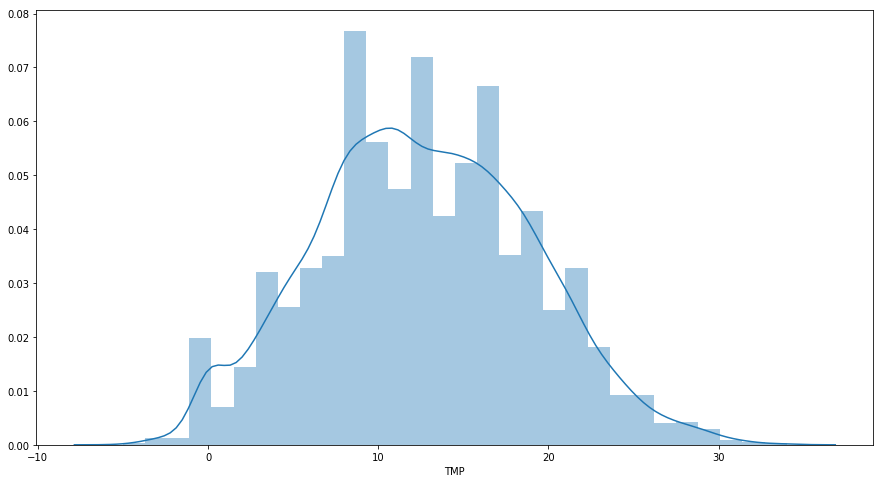

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt


df5 = pd.read_csv('fillna.csv')
df5 = df5.fillna(0)
df5.isna().sum()


plt.figure(figsize=(15,8))
sns.distplot(df5.TMP, bins =30)

In [157]:
df = pd.read_csv('fillna.csv')

knn_impute(target=df['TMP'], attributes=df.drop(['DATE', 'FEW'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)

NameError: name 'knn_impute' is not defined